# Feature Scaling

### Min/Max Rescaler Coding

In [1]:
def featureScaling(arr):
    min_val = min(arr)
    max_val = max(arr)
    scaled = [(x - min_val) / (max_val - min_val) for x in arr]
    return scaled

# tests of your feature scaler--line below is input data
data = [115, 140, 175]
print(featureScaling(data))

[0.0, 0.4166666666666667, 1.0]


Something to think about: What if x_max and x_min are the same? For example, suppose the list of input features is [10, 10, 10]--the denominator will be zero. Our suggestion would be in general to assign each new feature to 0.5 (halfway between 0.0 and 1.0), but it's really your call. The main point is that this exact formula can be broken.

### Min/Max Scaler in sklearn

In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
weights = np.array([[115], [140], [175]])
scaler = MinMaxScaler()
rescaled_weight = scaler.fit_transform(weights)
rescaled_weight

array([[0.        ],
       [0.41666667],
       [1.        ]])

# Feature Scaling Mini-Project

In [3]:
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.abspath("../tools/"))
from feature_format import featureFormat, targetFeatureSplit

In [4]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [5]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = joblib.load( open("../final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'salary': 26704229,
 'to_messages': 'NaN',
 'deferral_payments': 32083396,
 'total_payments': 309886585,
 'loan_advances': 83925000,
 'bonus': 97343619,
 'email_address': 'NaN',
 'restricted_stock_deferred': -7576788,
 'deferred_income': -27992891,
 'total_stock_value': 434509511,
 'expenses': 5235198,
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 311764000,
 'from_messages': 'NaN',
 'other': 42667589,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 48521928,
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 130322299,
 'director_fees': 1398517}

In [6]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

In [7]:
# rescaling
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
rescaled_finance_features = scaler.fit_transform(finance_features)

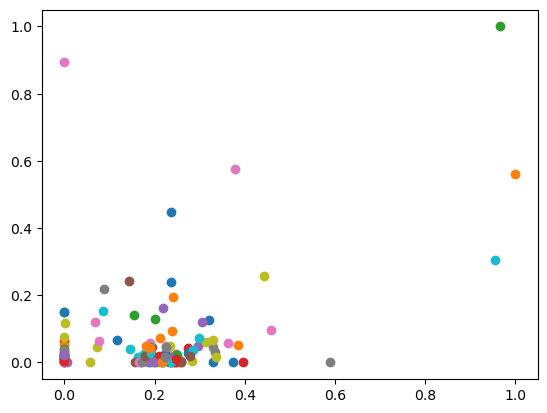

In [9]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in rescaled_finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [10]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data)
kmeans.labels_
kmeans.cluster_centers_

pred = kmeans.predict(data)


after K_Means clustering..


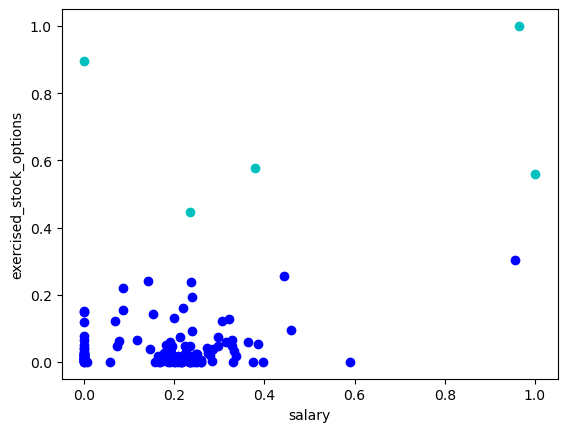

In [12]:
print('after K_Means clustering..')
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, rescaled_finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("No predictions object named pred found, no clusters to plot")

### Computing Rescaled Features
Apply feature scaling to your k-means clustering code from the last lesson, on the “salary” and “exercised_stock_options” features (use only these two features). **What would be the rescaled value of a "salary" feature that had an original value of 200,000, and an "exercised_stock_options" feature of 1 million?** (Be sure to represent these numbers as floats, not integers!)

In [13]:
import numpy as np
X_test = np.array([
                [200000.0,1000000.0]
                ])
X_test_rescaled = scaler.transform(X_test)
X_test_rescaled

array([[0.17997621, 0.02911345]])